Setup Imports

In [1]:
# Mount Google Drive (optional, if you want to save/load models in Drive)
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Load Dataset

In [24]:
# Upload from local files manually (uncomment this if using manual upload)
from google.colab import files
files.upload()  # Upload shapes_X.npy and shapes_y.npy here

X = np.load('shapes_X.npy')  # Shape (N, 64, 5)
y = np.load('shapes_y.npy')  # Shape (N,)

print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")
print(f"Classes: {np.unique(y)}")


Saving shapes_X.npy to shapes_X (1).npy
Saving shapes_y.npy to shapes_y (1).npy
Dataset shape: (100, 64, 5), Labels shape: (100,)
Classes: [0 1 2 3]


Train/Test Split (80/20)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]} | Testing samples: {X_test.shape[0]}")

Training samples: 80 | Testing samples: 20


Build 1D CNN Model

In [26]:
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(128, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = X_train.shape[1:]  # (64, 5)
num_classes = len(np.unique(y))

model = build_model(input_shape, num_classes)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 62, 64)         │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 29, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       229,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255,748 (999.02 KB)

 Trainable params: 255,748 (999.02 KB)

 Non-trainable params: 0 (0.00 B)

Compile and Train

In [48]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=51,
    batch_size=16,
    validation_split=0.1)


Epoch 1/51
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 440ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8750 - val_loss: 0.5016
Epoch 2/51
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9954 - loss: 0.0169 - val_accuracy: 0.8750 - val_loss: 0.5755
Epoch 3/51
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9954 - loss: 0.0097 - val_accuracy: 0.8750 - val_loss: 0.3833
Epoch 4/51
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9928 - loss: 0.0183 - val_accuracy: 0.8750 - val_loss: 0.3898
Epoch 5/51
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8750 - val_loss: 0.3483
Epoch 6/51
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9682 - loss: 0.0579 - val_accuracy: 0.8750 - val_loss: 0.2777
Epoch 7/51
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9841 - loss: 0.0244 - val_accuracy: 0.8750 - val_loss: 0.4188
Epoch 8/51
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0212 - val_accuracy: 0.8750 - val_loss: 0.3474

Evaluate on Test Set

In [49]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.8000 - loss: 1.8893

Test accuracy: 0.8000


Classification Report & Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step

Classification Report:
              precision    recall  f1-score   support

      square       0.67      0.40      0.50         5
   rectangle       0.57      0.80      0.67         5
    triangle       1.00      1.00      1.00         5
      circle       1.00      1.00      1.00         5

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.79        20
weighted avg       0.81      0.80      0.79        20



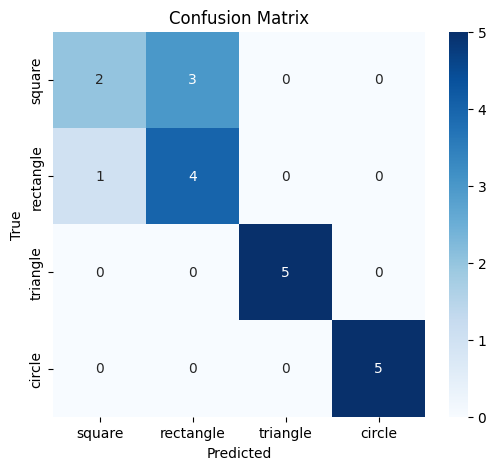

In [50]:
y_pred = model.predict(X_test).argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['square', 'rectangle', 'triangle', 'circle']))

# Optional: plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['square', 'rectangle', 'triangle', 'circle'], yticklabels=['square', 'rectangle', 'triangle', 'circle'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Export Model as TFLite

In [51]:
# Save Keras model
model.save('shape_classifier_model.h5')
print("✅ Keras model saved: shape_classifier_model.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite model
with open('shape_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ TFLite model saved: shape_classifier.tflite")
print(f"   Model size: {len(tflite_model) / 1024:.2f} KB")

# Download the model
from google.colab import files
files.download('shape_classifier.tflite')
print("\n📥 Download started - check your browser's download folder!")

✅ Keras model saved: shape_classifier_model.h5
Saved artifact at '/tmp/tmpj2_yjxiv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 5), dtype=tf.float32, name='keras_tensor_42')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  138534123911504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138535366639248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138534123908816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533654669328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533654660688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533654668368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533654659344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138533654659152: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ TFLite model saved: shape_classifier.tflite
   Model size: 1004.14 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📥 Download started - check your browser's download folder!
